# 영상입력 다중클래스분류모델 레시피
영상을 입력해서 다중클래스를 분류할 수 있는 모델들에 대하여 알아보겠다.<br>
숫자 손글씨 데이터셋인 MNIST을 이용하여 다층퍼셉트론 및 컨볼루션 신경망 모델을 구성하고 학습시켜보겠다.<br>
이 모델들은 아래 문제들에 활용을 기대해본다.<br>
- 동양인 얼굴 사진으로 한국인, 일본인, 중국인 구분
- 현미경 촬영 영상으로부터 다양한 균 구분
- 스마트폰으로 찍은 식물 종류 구분
- 기상위성영상으로부터 태풍타입 분류
<br>
### 1. 데이터셋 준비
케라스 함수에서 제공하는 숫자 손글씨 데이터셋인 MNIST을 이용하겠다.<br>
초기 라벨값은 0에서 9까지 정수로 지정하였다.<br>
데이터 정규화를 위해서 255.0으로 나누었다.<br>
<br>

- 다층퍼셉트론 신경망 모델에 입력하기 위해 데이터셋을 생성하는 코드

      (x_train, y_train), (x_test, y_test) = mnist.load_data()
      x_train = x_train.reshape(60000, width*height).astype('float32') / 255.0
      x_test = x_test.reshape(10000, width*height).astype('float32') / 255.0
      
<br>

- 컨볼루션 신경망 모델에 입력하기 위해 데이터셋을 생성하는 코드

      x_train = x_train.reshape(60000, width, height, 1).astype('float32') / 255.0
      x_test = x_test.reshape(10000, width, height, 1).astype('float32') / 255.0 
      
<br>
불러온 훈련셋을 다시 훈련셋을 50000개와 검증셋 10000개로 나누었습니다.<br>

    x_val = x_train[50000:]
    y_val = y_train[50000:]
    x_train = x_train[:50000]
    y_train = y_train[:50000]
    
<br>
다중클래스분류모델의 출력과 맞추기 위해 0에서 9까지 값이 저장된 라벨에 'one-hot 인코딩' 처리를 수행하겠다.<br>

    y_train = np_utils.to_categorical(y_train)
    y_val = np_utils.to_categorical(y_val)
    y_test = np_utils.to_categorical(y_test)
    
<br>
아래 코드는 만든 데이터셋 일부를 가시화해보았다.

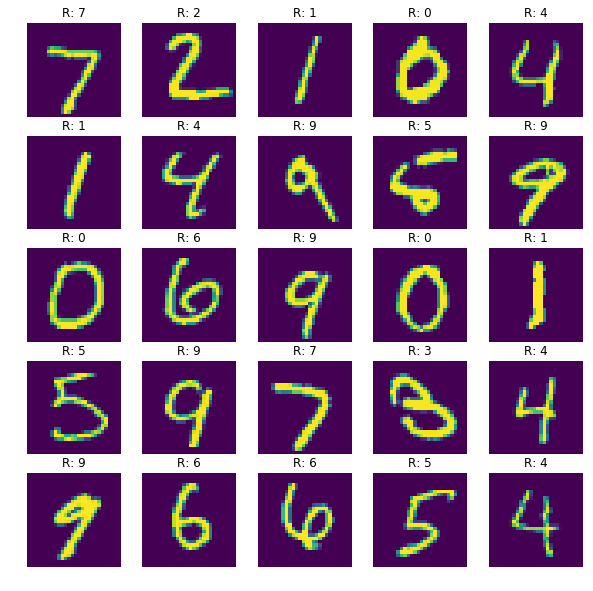

In [7]:
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils

width = 28
height = 28

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width*height).astype('float32') / 255.0
x_test = x_test.reshape(10000, width*height).astype('float32') / 255.0

x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

%matplotlib inline
import matplotlib.pyplot as plt

plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    sub_plt = axarr[i//plt_row, i%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    
    sub_plt_title = 'R: ' + str(np.argmax(y_test[i]))
    
    sub_plt.set_title(sub_plt_title)

plt.show()

### 2. 레이어 준비
여기서는 새롭게 소개되는 레이어가 없다.<br>

### 3. 모델 준비
영상을 입력하여 다중클래스분류를 하기 위해 다층퍼셉트론 신경망 모델, 컨볼루션 신경망 모델, 깊은 컨볼루션 신경망 모델을 준비하였다.<br>
<br>
- 다층퍼셉트론 신경망 모델

      model = Sequential()
      model.add(Dense(256, input_dim=width*height, activation='relu'))
      model.add(Dense(256, activation='relu'))
      model.add(Dense(256, activation='relu'))
      model.add(Dense(1, activation='softmax'))
<br>    
- 컨볼루션 신경망 모델

      model = Sequential()
      model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 1)))
      model.add(MaxPooling2D(pool_size=(2, 2)))
      model.add(Conv2D(32, (3, 3), activation='relu'))
      model.add(MaxPooling2D(pool_size=(2, 2)))
      model.add(Flatten())
      model.add(Dense(256, activation='relu'))
      model.add(Dense(1, activation='softmax'))
<br>        
- 깊은 컨볼루션 신경망 모델

      model = Sequential()
      model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 1)))
      model.add(Conv2D(32, (3, 3), activation='relu'))
      model.add(MaxPooling2D(pool_size=(2, 2)))
      model.add(Dropout(0.25))
      model.add(Conv2D(64, (3, 3), activation='relu'))
      model.add(Conv2D(64, (3, 3), activation='relu'))
      model.add(MaxPooling2D(pool_size=(2, 2)))
      model.add(Dropout(0.25))
      model.add(Flatten())
      model.add(Dense(256, activation='relu'))
      model.add(Dropout(0.5))
      model.add(Dense(10, activation='softmax'))
      
      
### 4. 전체 소스






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/30





50000/50000 [==============================] - 6s 124us/step - loss: 0.6688 - acc: 0.8255 - val_loss: 0.2982 - val_acc: 0.9139
Epoch 2/30
50000/50000 [==============================] - 4s 71us/step - loss: 0.2832 - acc: 0.9166 - val_loss: 0.2385 - val_acc: 0.9330
Epoch 3/30
50000/50000 [==============================] - 4s 71us/step - loss: 0.2253 - acc: 0.9346 - val_loss: 0.1917 - val_acc: 0.9449
Epoch 4/30
50000/50000 [==============================] - 3s 65us/step - loss: 0.1881 - acc: 0.9459 - val_loss: 0.1698 - val_acc: 0.9531
Epoch 5/30
50000/50000 [==============================] - 3s 67us/step - loss: 0.1606 - acc: 0.9532 - val_loss: 0.1584 - val_acc: 0.9577
Epoch 6/30
50000/50000 [==============================] - 3s 67us/step - loss: 0.1392 - acc: 0.9593 - val_loss: 0.1319 - val_acc: 0.9640
Epoch 7/30
50000/500

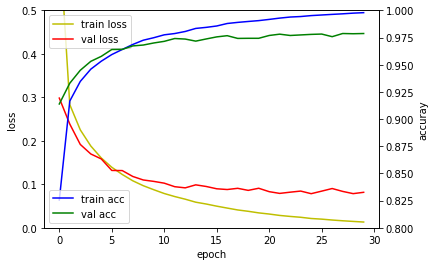

10000/10000 [==============================] - 0s 26us/step
## evaluation loss and_metrics ##
[0.07713422030342044, 0.9775]


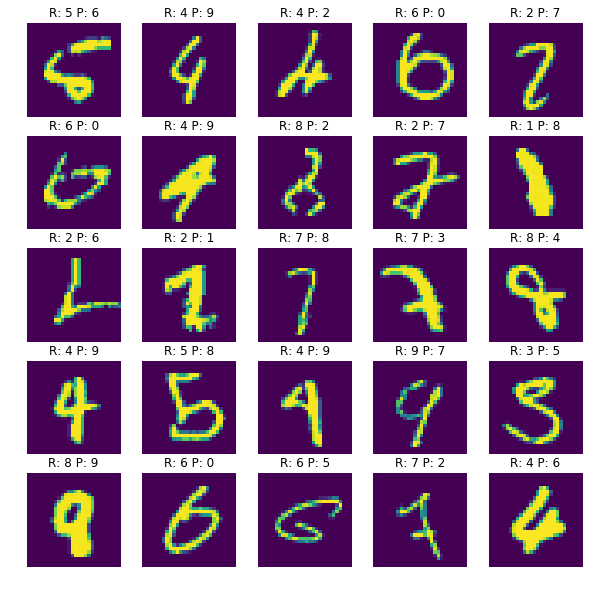

In [8]:
# 다층퍼셉트론 신경망 모델

# 0. 사용할 패키지 불러오기
import numpy as np

from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

width = 28
height = 28

# 1. 데이터셋 생성하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width*height).astype('float32') / 255.0
x_test = x_test.reshape(10000, width*height).astype('float32') / 255.0

# 훈련셋과 검증셋 분리
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

# 데이터셋 전처리 : one-hot 인코딩
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(256, input_dim=width*height, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val))

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 0.5])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.8, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

# 7. 모델 사용하기
yhat_test = model.predict(x_test, batch_size=32)

%matplotlib inline
import matplotlib.pyplot as plt

plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col)

cnt = 0
i = 0

while cnt < (plt_row*plt_col):
    
    if np.argmax(y_test[i]) == np.argmax(yhat_test[i]):
        i += 1
        continue
    
    sub_plt = axarr[cnt/plt_row, cnt%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt_title = 'R: ' + str(np.argmax(y_test[i])) + ' P: ' + str(np.argmax(yhat_test[i]))
    sub_plt.set_title(sub_plt_title)

    i += 1    
    cnt += 1

plt.show()



Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 7s 139us/step - loss: 0.5331 - acc: 0.8456 - val_loss: 0.2047 - val_acc: 0.9411
Epoch 2/30
50000/50000 [==============================] - 5s 103us/step - loss: 0.1741 - acc: 0.9459 - val_loss: 0.1209 - val_acc: 0.9670
Epoch 3/30
50000/50000 [==============================] - 5s 95us/step - loss: 0.1174 - acc: 0.9638 - val_loss: 0.0928 - val_acc: 0.9723
Epoch 4/30
50000/50000 [==============================] - 5s 96us/step - loss: 0.0909 - acc: 0.9721 - val_loss: 0.0784 - val_acc: 0.9771
Epoch 5/30
50000/50000 [==============================] - 5s 95us/step - loss: 0.0765 - acc: 0.9761 - val_loss: 0.0737 - val_acc: 0.9781
Epoch 6/30
50000/50000 [==============================] - 5s 94us/step - loss: 0.0661 - acc: 0.9793 - val_loss: 0.0839 - val_acc: 0.9764
Epoch 7/30
50000/50000 [==============================] - 5s 94us/step - loss: 0.0584 - acc: 0.9816 - val_loss: 0.0742 - val_

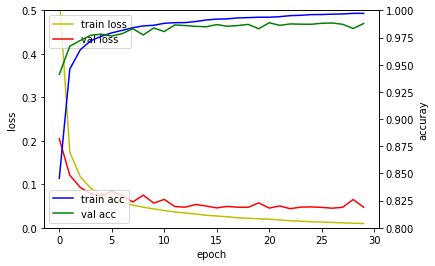

10000/10000 [==============================] - 0s 40us/step
## evaluation loss and_metrics ##
[0.04089508584615178, 0.9879]


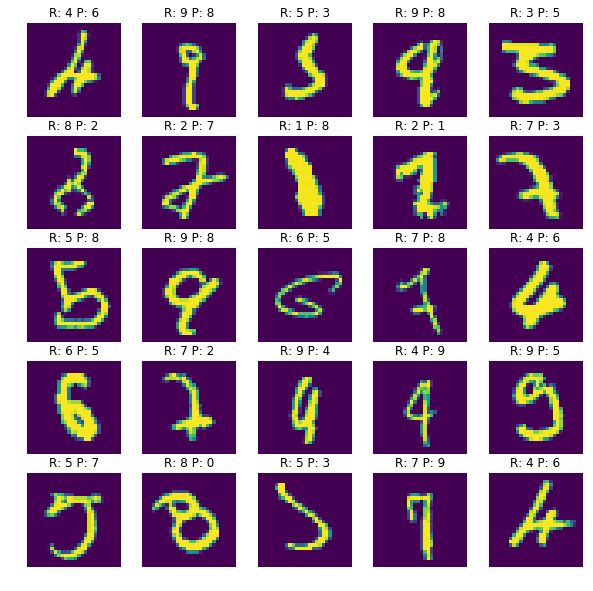

In [9]:
# 컨볼루션 신경망 모델

# 0. 사용할 패키지 불러오기
import numpy as np
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Conv2D, MaxPooling2D, Flatten

width = 28
height = 28

# 1. 데이터셋 생성하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width, height, 1).astype('float32') / 255.0
x_test = x_test.reshape(10000, width, height, 1).astype('float32') / 255.0

# 훈련셋과 검증셋 분리
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

# 데이터셋 전처리 : one-hot 인코딩
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val))

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 0.5])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.8, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

# 7. 모델 사용하기
yhat_test = model.predict(x_test, batch_size=32)

%matplotlib inline
import matplotlib.pyplot as plt

plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col)

cnt = 0
i = 0

while cnt < (plt_row*plt_col):
    
    if np.argmax(y_test[i]) == np.argmax(yhat_test[i]):
        i += 1
        continue
    
    sub_plt = axarr[cnt/plt_row, cnt%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt_title = 'R: ' + str(np.argmax(y_test[i])) + ' P: ' + str(np.argmax(yhat_test[i]))
    sub_plt.set_title(sub_plt_title)

    i += 1    
    cnt += 1

plt.show()



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 8s 166us/step - loss: 0.7760 - acc: 0.7384 - val_loss: 0.1482 - val_acc: 0.9582
Epoch 2/30
50000/50000 [==============================] - 7s 148us/step - loss: 0.2319 - acc: 0.9287 - val_loss: 0.0964 - val_acc: 0.9711
Epoch 3/30
50000/50000 [==============================] - 7s 145us/step - loss: 0.1673 - acc: 0.9481 - val_loss: 0.0769 - val_acc: 0.9773
Epoch 4/30
50000/50000 [==============================] - 7s 147us/step - loss: 0.1412 - acc: 0.9566 - val_loss: 0.0656 - val_acc: 0.9805
Epoch 5/30
50000/50000 [==============================] - 8s 157us/step - loss: 0.1222 - acc: 0.9617 - val_loss: 0.0588 - val_acc: 0.9828
Epoch 6/30
50000/50000 [==============================] - 7s 147us/step - loss: 0.1086 - acc: 0.9663 - val_loss: 0.0566 - val_acc: 0.9838
Epoch 

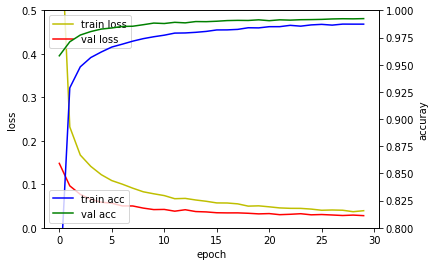

10000/10000 [==============================] - 1s 55us/step
## evaluation loss and_metrics ##
[0.019503827182177337, 0.9934]


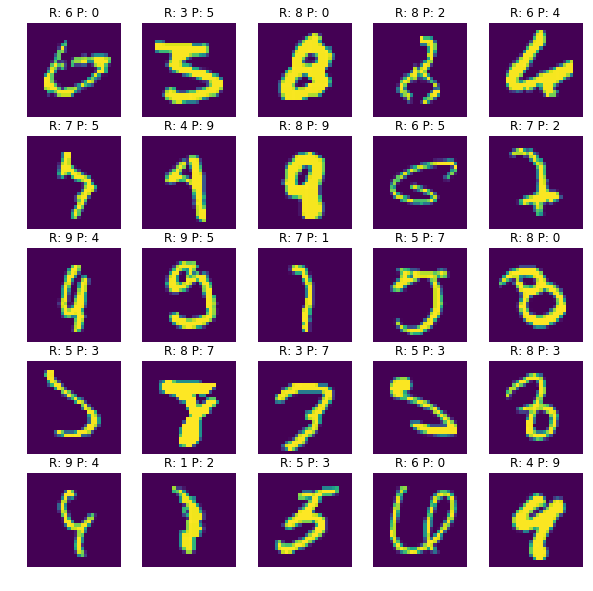

In [10]:
# 깊은 컨볼루션 신경망 모델

# 0. 사용할 패키지 불러오기
import numpy as np

from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.layers import Dropout

width = 28
height = 28

# 1. 데이터셋 생성하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width, height, 1).astype('float32') / 255.0
x_test = x_test.reshape(10000, width, height, 1).astype('float32') / 255.0

# 훈련셋과 검증셋 분리
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

# 데이터셋 전처리 : one-hot 인코딩
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val))

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 0.5])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.8, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

# 7. 모델 사용하기
yhat_test = model.predict(x_test, batch_size=32)

%matplotlib inline
import matplotlib.pyplot as plt

plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col)

cnt = 0
i = 0

while cnt < (plt_row*plt_col):
    
    if np.argmax(y_test[i]) == np.argmax(yhat_test[i]):
        i += 1
        continue
    
    sub_plt = axarr[cnt/plt_row, cnt%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt_title = 'R: ' + str(np.argmax(y_test[i])) + ' P: ' + str(np.argmax(yhat_test[i]))
    sub_plt.set_title(sub_plt_title)

    i += 1    
    cnt += 1

plt.show()


### 5. 학습결과 비교
다층퍼셉트론 신경망 모델은 훈련정확도는 검증 손실값은 높아지고 과적합이 발생하였다.<br>
컨볼루션 신경망 모델에 비해 높은 성능이 보이고 있다.<br>
깊은 컨볼루션 신경망 모델은 dropout 레이어 덕분에 과적합이 발생하지 않고 검증 손실값이 지속적으로 떨어지고 있는 것을 알 수 있다.